# **Inteligencia Artificial y Aprendizaje Automático**
## **Maestría en Inteligencia Artificial Aplicada**
### **profesor: Dr Luis Eduardo Falcón Morales**
### **Tecnológico de Monterrey**

### **Semana 2**

## **Tema: Procesamiento y transformación de datos en un problema de Regresión.**

# **0) Introducción**


##### La manera de preparar y analizar los datos en un problema de aprendizaje automático es muy diversa y depende tanto del problema mismo, como de la naturaleza de los datos. Y aunque no existen reglas generales para resolver un problema, existen diversas metodologías (CRSIP_DM) para abordar un problema, siendo la preparación de los datos una de las primeras instancias que se deben empezar a abordar de manera edecuada. A lo largo del curso iremos viendo diversos casos y ejemplos para la preparación de los datos, es decir, para el preprocesamiento de los datos, los cuales te permitirán ir agarrando experiencia, para que en el corto plazo puedas estar decidiendo por tí mismo la forma de abordar un problema de aprendizaje automático.

##### En particular, en el ejercicio de este cuaderno de Jupyter mostraremos algunas de las primeras técnicas de preprocesamiento de los datos que hay que empezar a tomar en cuenta. Iniciaremos con un modelo de cregresión, para un problema de aprendizaje supervisado usando un modelo de regresión lineal.

##### Por el momento iniciaremos aplicando algunas técnicas de preprocesamiento de datos muy generales, y al ir avanzando y cuando así se requiera, iremos adentrándonos en mayor detalle.

##### Cuando así lo requieras, podrás regresar y analizar los ejemplos con mayor detalle. Igualmente recuerda siempre revisar la documentación correspondiente de cada función o modelo utilizado.

##### Recordemos que la Inteligencia Artificial en general y el Aprendizaje Automático en particular, son muy poderosas porque están soportadas por mucha Matemática, Estadística y Álgebra Lineal, entre otras áreas.

##### **Todo lo referente a los conceptos previos de Matemáticas lo podrás encontrar en Canvas en la sección llamada "Anexo: Temas de Matemáticas".**

##### **Cuando se requiera hacer uso de temas de Matemáticas, los estaremos mencionando y repasando brevemente dentro del curso, pero para profundizar más en el tema deberás revisar la bibliografía correspondiente.**

##### **En particular, en este ejercicio y en la actividad de esta semana, trabajaremos con el modelo de regresión logística. Puedes repasar su teoría y conceptos en la sección de Anexo que te acabamos de mencionar.**





## **Objetivos de la presente actividad:**

*   ### **Conocer y aplicar el concepto de partición en los conjuntos de entrenamiento (train), validación (val) y prueba (test).**

*   ### **Conocer algunas métricas de desempeño en un problema de regresión lineal múltiple.**

*   ### **Conocer el llamado problema de filtrado de información o filtrado de datos (data leakage) y aplicar las técnicas de prepocesamiento, entrenamiento y evaluación del modelo de manera que se evite dicho problema.**

*   ### **Aplicar el modelo de regresión lineal múltiple con técnicas de regularización para enfrentar el problema del sobreentrenamiento (overfitting) y el subentrenamiento (underfitting).**

*   ### **Seleccionar los mejores factores del mejor modelo de predicción obtenido.**

# **1) Cargando y preparando los datos.**

##### Para este ejemplo usaremos los datos llamados "tips", que encontramos dentro de las bases de datos que tiene la librería Seaborn para cargarlos de manera predeterminada.

##### **Los datos fueron recabados por el mesero de un restaurante durante varios meses, sobre el monto de propina que le dieron de acuerdo a varias variables que consideró, entre ellas el monto de la comida, el día de la semana, la cantidad de personas.**

##### Puedes encontrar información correspondiente a los datos "tips" en las siguientes ligas:


https://www.kaggle.com/datasets/jsphyg/tipping

https://github.com/mwaskom/seaborn-data?tab=readme-ov-file

In [48]:
import numpy as np      # biblioteca de Python para funciones y manipulación de matrices y vectores.
import pandas as pd     # biblioteca de Python para una mejor manipulación de los datos en forma tabular.
import matplotlib       # biblioteca de Python para la visualización gráfica de datos.
import matplotlib.pyplot as plt   # Módulo de matplotlib generar gráficos de manera similar a MATLAB.
import seaborn as sns   # biblioteca de Python con una mayor variedad en el despliegue de gráficos, sobre todo estadísticos.

import sklearn    # biblioteca gratuita para aprendizaje automático y de código abierto.
from sklearn.model_selection import train_test_split  # Método para particionar los datos.
from sklearn.preprocessing import StandardScaler      # Método para escalar los datos numéricos con (x-mean)/std.
from sklearn.preprocessing import OneHotEncoder       # Técnica de codificación llamada "One Hot Encoding".
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet   # Modelos de regresión lineal que usaremos en los ejemplos.
from sklearn.metrics import mean_squared_error        # Importamos la función del error cuadrático medio (MSE)

In [49]:
# Veamos las versiones de las bibliotecas utilizadas:

tmp = !python -V
print(tmp[0])
print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)
print('Scikit-Learn', sklearn.__version__)

Python 3.10.12
Numpy 1.26.4
Pandas 2.1.4
Matplotlib 3.7.1
Seaborn 0.13.1
Scikit-Learn 1.3.2


In [50]:
tips = sns.load_dataset("tips")   # cargamos los datos en un DataFrame de Pandas

print(tips.shape)   # dimensión del conjunto de datos
tips.head(3)        # visualizamos los primeros registros

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


*   ##### De la salida anterior y la documentación de los datos de "tips", encontramos que tenemos 244 registros y 7 variables.

*   ##### La variable a predecir es "tip", el monto de la propina que se le dió al mesero, y la denotaremos como "y". El resto de las variables serán nuestras variables de entrada y las denotaremos por "X": el total de la cuenta (total_bill); sexo de la persona que pagó la cuenta (sex); sección de fumadores (smoker); día de la semana (day); tiempo o comida del día (time) y tamaño o cantidad de personas que comieron (size).**

*   ##### Las unidades monetarias son en dólares.

*   Observa que de manera general la variable de salida se denota con una letra minúscula, en este caso "y", para indicar que representa a una sola variable o columna de los datos. Y para las variables de entrada es usual emplear una letra mayúscula, en este caso "X", para indicar que es una matriz (o "data frame") formada por varias columnas o variables.

*   ##### **Así, estamos en lo que se llama un problema de regresión, en el cual, para cada registro y con base a la información de sus 6 variables de entrada X, deseamos predecir el número real o flotante de la variable de salida "y".**

In [51]:
X = tips[['total_bill','sex','smoker','day','time','size']]    # nuestras variables de entrada.
y = tips[['tip']]                                              # nuestra variable de salida.

# **2) Conjuntos de Entrenamiento, Validación y Prueba.**

Recuerda que en cualquier problema de aprendizaje automático, AA (machine learning), lo recomendable es trabajar con una triple partición del universo de datos, con los llamdos conjuntos de Entrenamiento, Validación y Prueba.

Debes de tener presente que no debemos usar todo el universo de datos inicial para construir y entrenar un modelo de aprendizaje automático, para después volver a utilizar dicho universo de datos para verificar qué tan bien realiza las predicciones. Utilizar los mismos datos que ya hemos usado para entrenar un modelo, para ahora evaluarlo con el mismo conjunto, no sería de gran valor, ya que son datos que el modelo ha analizado durante el entrenamiento y por lo tanto ya los conoce. Es decir, querer hacer predicciones con el mismo conjunto de entrenamiento para evaluar un modelo, no representaría en realidad un gran reto y nos llevaría a obtener resultados alejados de la realidad y demasiado optimistas.

Usar todo el universo de datos para entrenar y validar nuestro modelo nos lleva en general al llamado problema del "sobreentrenamiento", también llamado "sobreajuste" ("overfitting" en inglés). En otras palabras, el modelo podría simplemente estarse memorizando los datos que ha estado usando, por lo que al momento de querer hacer predicciones con nuevos datos, obtendríamos predicciones alejadas de la realidad.

Es por esto que siempre debemos realizar un partición del universo inicial en tres conjuntos: el conjunto de entrenamiento (train), el de validación (val) y el de prueba (test). Utilizaremos el conjunto de Entrenamiento (Training en inglés) para obtener los pesos del modelo en una primera iteración y en el llamado proceso o etapa de entrenamiento. La arquitectura del modelo, junto con los pesos obtenidos en la etapa de entrenamiento nos definen el modelo que podemos usar para realizar predicciones. Sin embargo, ahora debemos verificar si los pesos obtenidos del modelo son los más adecuados para hacer predicciones con datos nuevos. Pero como ya comentamos, no sería retador usar el mismo conjunto de entrenamiento para querer representar a "datos nuevos", puesto que estos ya los analizó durante el entrenamiento. Es aquí donde se requiere el conjunto llamado de Validación (Validation en inglés) y que nos ayudará a simular los datos nuevos que nunca ha visto nuestro modelo. Así, con el conjunto de validación hacemos las predicciones y validamos qué tan bien lleva a cabo las predicciones con alguna métrica definida. Hay que recordar que en el caso de aprendizaje supervisado conocemos los valores reales de salida, por lo que se puede hacer la evaluación del modelo midiendo la diferencia entre las predicciones y los valores reales. Seguramente las predicciones con los pesos del modelo obtenido en esta primera iteración serán bastante diferentes de los valores reales, por lo que repetiremos los pasos anteriores en un proceso iterativo cuyo objetivo será minimizar dicho error. Así, procediendo de esta manera iterativa se estarán obteniendo nuevos pesos para el modelo, que reduzcan el error hasta un valor que se considere adecuado para los objetivos del problema. Supongamos que finalmente se obtiene el valor del error mínimo deseado con la configuración de ciertos pesos que definen nuestro mejor modelo que llamaremos modelo final. Ahora, como el conjunto de validación lo hemos estado utilizando en cada etapa iterativa para hacer los ajustes de los pesos y para medir el error de predicción, podemos inferir que dicho modelo también ha estado observando y aprendiendiendo el comportamiento de estos, por lo que de nuevo, no sería muy significativo volver a utilizar este mismo conjunto para obtener una evaluación final. Es por ello que ahora utilizaremos el conjunto de prueba (train) para obtener el desempeño del modelo final con datos que no ha visto hasta este momento. Como estos datos llamados de prueba no han sido vistos ni analizados durante la etapa de entrenamiento por el modelo, podemos decir que son viables para representar datos nuevos y poder evaluar mejor cómo se va a estar comportando el modelo al ponerlo en producción y evaluando datos reales que vayan surgiendo. En resumen, como estos datos llamados de prueba no se usaron durante la etapa de entrenamiento, ni durante la de validación, los podemos utilizar para hacer una última evaluación del error y por lo tanto del mejor desempeño del modelo final.

Ver la imagen a continuación:

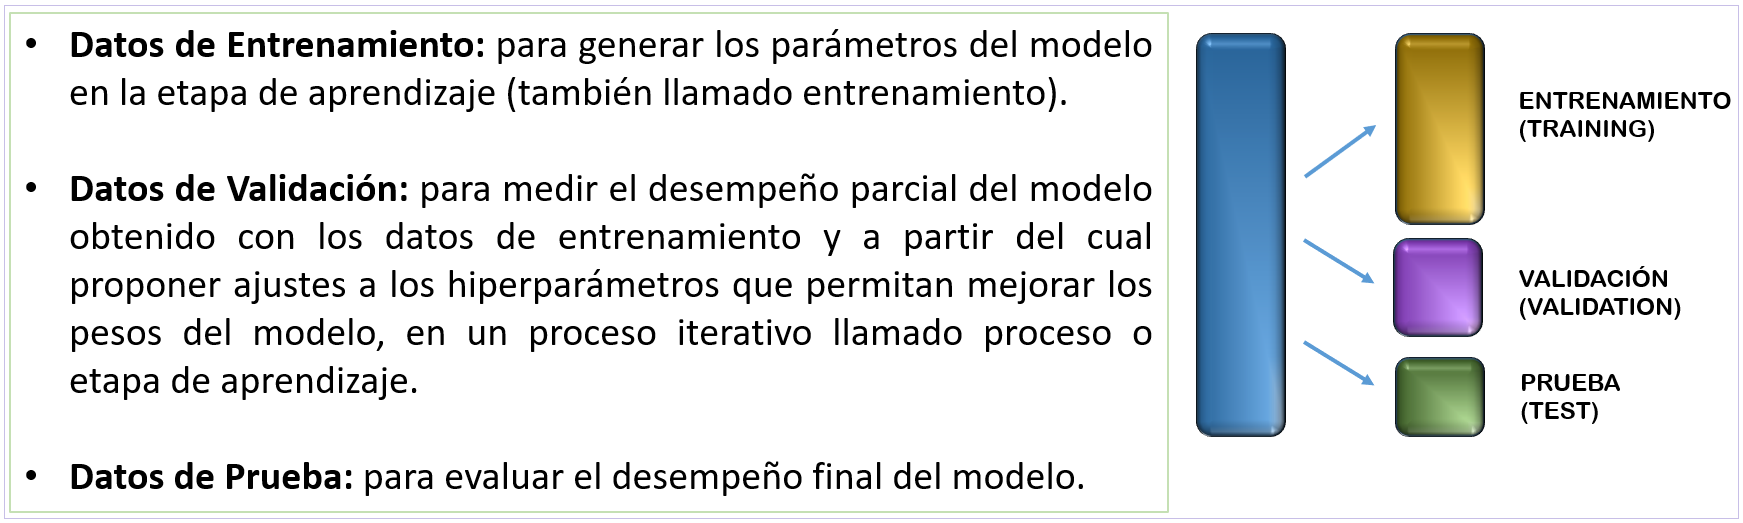

####**En resumen, durante toda la etapa de preprocesamiento y entrenamiento del modelo el análisis y extracción de información deberá ser solo a partir del conjunto de Entrenamiento (Train) y con dicha información transformar los datos de validación y prueba.**

**Por ejemplo, supongamos que durante el análisis con el conjunto de entrenamiento en la etapa de preprocesamiento se decide escalar las variables numéricas de entrada mediante la transformación $\frac{x-min}{max - min}$, donde $min$ y $max$ son los datos mínimo y máximo del conjunto de entrenamiento, entonces con estos mismos valores deberás llevar a cabo el escalamiento en los conjuntos de validación y prueba. De no hacerlo así se está filtrando información a los datos que están simulando los de la vida real de los cuales no conocemos nada de antemano. Este es el llamado problema de filtrado de información (data leakage en inglés) durante el proceso de entrenamiento.**

##### **Procedamos entonces a la partición del universo original de datos en los conjuntos de entrenamiento (train), validación (val) y prueba (test), para enfrentar con ellos el llamadao filtrado de información (data-leakage).**

In [52]:
# Particionamos los datos en Entrenamiento (Train), Validación (Val) y Prueba (Test).
# Para este ejercicio tomemos la partición de 50% (Train), 25% (Val) y 25% (Test):

X_train, Xvt, y_train, yvt = train_test_split(X,      # Variables de entrada.
                                              y,      # variable de salida.
                                              train_size=0.7,  # Puedes indicar el tamaño o proporción del conjunto "train" o del "test".
                                              random_state=1  # Asignamos una semilla para garantizar la repetibilidad de los resultados.
                                              )
X_val, X_test, y_val, y_test = train_test_split(Xvt, yvt, test_size=0.5,  random_state=3)

print("Tamaño de los datos de entrenamiento:", X_train.shape)
print("Tamaño de los datos de validación:", X_val.shape)
print("Tamaño de los datos de prueba:", X_test.shape)

Tamaño de los datos de entrenamiento: (170, 6)
Tamaño de los datos de validación: (37, 6)
Tamaño de los datos de prueba: (37, 6)


##### Obtengamos alguna información y descripción general de los datos. **Recuerda obtener la información solamente de los datos de entrenamiento, para evitar el llamado problema de filtrado de información.**

In [53]:
X_train.info()   # Observamos que no hay datos perdidios en las variables de entrada del conjunto de entrenamiento
                 # y donde 2 variables son numéricas (1 de valor real y otra de valor entero) y 4 categóricas.

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 59 to 37
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  170 non-null    float64 
 1   sex         170 non-null    category
 2   smoker      170 non-null    category
 3   day         170 non-null    category
 4   time        170 non-null    category
 5   size        170 non-null    int64   
dtypes: category(4), float64(1), int64(1)
memory usage: 5.2 KB


In [54]:
y_train.info()     # Tampoco tenemos datos perdidos en la variable de salida de entrenamiento y son de valor entero las etiquetas.

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 59 to 37
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tip     170 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


# **3) Tipos de Variables.**

### **Variables numéricas de entrada**

In [55]:
X_train.describe().T    # Obtengamos un resumen numérico de las variables numéricas de entrada con los datos de entrenamiento.

,count,mean,std,min,25%,50%,75%,max
total_bill,170.0,19.498588,8.798824,5.75,13.3825,17.3,23.535,48.33
size,170.0,2.570588,0.990048,1.00,2.0000,2.0,3.000,6.00


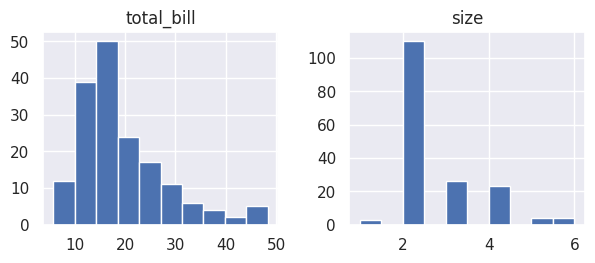

In [56]:
X_train.hist(figsize=(7,2.5));   # y también obtengamos una visualización de estas dos variables numéricas de entrada.

##### **Observamos que la variablidad de las variables numéricas de entrada difieren en un orden de magnitud, por lo que sería recomendable escalarlos.**

##### Existe diversas maneras de transformar los datos, en particular, en esta ocasión vamos a trasnformarlos para que ambas variables numéricas estén aproximadamente en un mismo rango de variabilidad .

##### **Para ello, aplicaremos la transformación estándar (x-mean)/std, donde "x" es el valor a transformar, "mean" el valor de la media de los datos de entrenamiento y "std" la desviación estándar de los datos de entrenamiento. A esta transformación también se le suele llamar proceso de normalización. Observa que sin importar que transformemos los datos de entrenamiento, los de validación o los de pureba, siempre debemos usar el valor de la media y de la desviación estándar del conjunto de entrenamiento, esto nos ayudará a eviar el problema del filtrado de información (data-leakage).**

##### **Haremos uso de la librería de scikit-learn para aplicar esta transformación. Observa la manera de aplicarlo para evitar el filtrado de información.**

##### Puedes consultar la documentación de esta transformación en la siguiente liga:


Ver documentación: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### **PREGUNTA:**

**Antes de continuar responde a la siguiente pregunta: ¿por qué es importante que las variables de entrada estén aproximadamaente en un mismo rango de variabilidad?**

In [57]:
# Antes de continuar con la transformación de los datos de entrada, hagamos una copia de los datos
# para fines de este ejercicio y poder monitorear cada caso de manera independiente:

X_train_t1 = X_train.copy()
X_val_t1 = X_val.copy()
X_test_t1 = X_test.copy()

In [58]:
scaler = StandardScaler()  # Instanciamos la función de escalamiento.
scaler.fit(X_train[['total_bill','size']])  # Hacemos primero "el ajuste" con los datos de entrenamiento para evitar el filtrado de información.

# Podemos usar los mismos nombres, pero por el momento los cambiamos para darle un mejor seguimiento al ejercicio.
# Ahora usemos esta transformación ajustada con los datos de entrenamiento para después aplicarla a los conjuntos Train, Val y Test,
# lo cual evita el problema del filtrado de información.

X_train_t1[['total_bill','size']] = scaler.transform(X_train[['total_bill','size']])  # Transformamos los datos de entrenamiento.
X_val_t1[['total_bill','size']] = scaler.transform(X_val[['total_bill','size']])      # Transformamos los datos de validación.
X_test_t1[['total_bill','size']] = scaler.transform(X_test[['total_bill','size']])    # Transformamos los datos de prueba.


In [59]:
# En particular los siguientes valores son de ajuste realizado con
# los datos de entrenamiento para cada variable numérica de entrada,
# a saber, "total_bill" y "size", respectivamente:

print('Medias:', scaler.mean_)
print('Desviaciones estándar:', scaler.scale_)

Medias: [19.49858824  2.57058824]
Desviaciones estándar: [8.77290657 0.98713174]


### **Variables categóricas de entrada**

Realicemos ahora un primer análisis de los datos categóricos de entrada, usando nuevamente, solo los datos de entrenamiento.

Despleguemos la proporción de cada nivel. Recuerda que en general algunos analistas consideran que lo adecuado es que cada nivel tenga al menos un $5\%$ de información. De no ser así, se deberían ir agrupando los niveles más pequeños hasta completar el procentaje establecido.

Este porcentaje no es universal, de hecho algunos analistas consideran que debiera ser el $10\%$ y otros dicen que debiera ser el $3\%$. Mientras no se diga lo contrario, nosotros consideraremos el valor del $5\%$.


In [60]:
X_train_t1.describe(include='category').T

,count,unique,top,freq
sex,170,2,Male,110
smoker,170,2,No,112
day,170,4,Sat,57
time,170,2,Dinner,118


La tabla anterior nos indica que tenemos 3 variables binarias y una catagórica con 4 niveles.


Y a continuación la información mostrada nos indica que nos necesario hacer algún tipo de ajuste en los niveles de las variables categóricas, con base al criterio del $5\%$ mencionado previamente.

In [61]:
X_train_t1['sex'].value_counts() / X_train_t1.shape[0]

,count
sex,
Male,0.647059
Female,0.352941


In [62]:
X_train_t1['smoker'].value_counts() / X_train_t1.shape[0]

,count
smoker,
No,0.658824
Yes,0.341176


In [63]:
X_train_t1['day'].value_counts() / X_train_t1.shape[0]

,count
day,
Sat,0.335294
Sun,0.317647
Thur,0.288235
Fri,0.058824


In [64]:
X_train_t1['time'].value_counts() / X_train_t1.shape[0]

,count
time,
Dinner,0.694118
Lunch,0.305882


### **Variables categóricas y codificación One-Hot-Encoding o Variables dummies**

Como hemos comentado, existen diversas técnicas para transformar las variables categóricas a valores numéricos que puedan entender los modelos a utilizar.

En particular para todas las 4 variables categóricas de entrada aplicaremos el proceso de codificación llamado one-hot-encoding o variables dummies y que la biblioteca Pandas tiene la función get_dummies() que nos ayudará a transformar dichas variables.

Puedes consultar la información respectiva en la siguiente liga:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

Scikit-learn también tiene una clase para la transformación One-Hot-Encoding, pero por el momento utilicemos get_dummies() de Pandas.

In [65]:
# Nuevamente para fines del ejercicio hacemos una copia de los datos antes
# de llevar a cabo las transformaciones de las variables categóricas:
X_train_t2 = X_train_t1.copy()
X_val_t2 = X_val_t1.copy()
X_test_t2 = X_test_t1.copy()


# Una vez decidido las variables a transformar mediante el análisis de los datos
# de entrenamiento, procedemos con One-Hot-Encoding usando en esta ocasión la
# función get_dummies() de Pandas:
X_train_t2 = pd.get_dummies(data=X_train_t1, columns=['sex','smoker','day','time'], drop_first=True)
X_val_t2 = pd.get_dummies(data=X_val_t1, columns=['sex','smoker','day','time'], drop_first=True)
X_test_t2 = pd.get_dummies(data=X_test_t1, columns=['sex','smoker','day','time'], drop_first=True)

X_train_t2.head(3)   # desplegamos los primeros registros de los datos transformados al momento

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
59,3.279576,1.448046,False,True,False,True,False,True
102,2.827046,0.435010,True,False,False,True,False,True
147,-0.869562,-0.578026,True,True,False,False,False,False


In [66]:
print('Dimensión de los datos originales:',X_train_t1.shape)
print('Dimensión después de transformadas las variables:',X_train_t2.shape)

Dimensión de los datos originales: (170, 6)
Dimensión después de transformadas las variables: (170, 8)


En particular en este ejemplo y después de las transformaciones realizadas, se generaron dos nuevos factores o columnas a partir de la variable categórica de entrada "day" con el método de One-Hot-Encoding.

Así, a partir de estas 8 variables de entrada, queremos generar un modelo de regresión lineal múltiple, que nos ayude a predecir la variable de salida, a saber, la propina dada al mesero.

### **Variable de salida**

Recordemos que ya vimos al inicio que la variable de salida "tips", representa el monto de la porpina en unidades monetarias que recibió el mesero para cada servicio registrado.

Para visualizar mejor el comportamiento de esta variable del conjunto de entrenamiento, podemos generar el siguiente gráfico conjunto del diagrama de caja y el histograma mediante Seaborn:

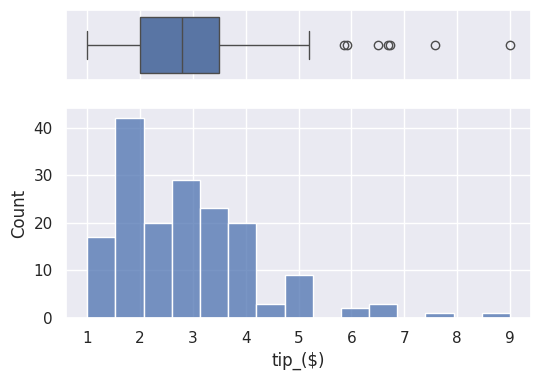

In [67]:
sns.set(rc={'figure.figsize':(6,4)})   # Ajustamos el tamaño de la figura con (ANCHO,ALTO).

# Creamos una figura formada por dos objetos "matplotlib.Axes": (ax_box and ax_hist):
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})

# ASignamos el gráfico a correspondiente a cada "ax":
sns.boxplot(y_train['tip'], orient="h", ax=ax_box)
sns.histplot(data=y_train, x="tip", ax=ax_hist)

ax_box.set(xlabel='')  # quitemos el nombre del eje horizontal del boxplot
ax_hist.set(xlabel='tip_($)')
plt.show()   # desplegamos las dos gráficas.

Obsvamos que tenemos un comportamiento acampanado pero con sesgo positivo (o hacia la derecha), con algunos valores extremos (outliers).

En particular resalta el valor extremo (outlier) cerca de los 10 dólares.

Como una simple información complementaria vemos qué característica tienen los registros de propinas que generaron estos valores extremos.

In [68]:
idxs = y_train.index[y_train['tip'] > 6]    # de acuerdo a los gráficos de arriba, tomemos 6 como umbral.

X_train.loc[idxs].join(y_train.loc[idxs])

,total_bill,sex,smoker,day,time,size,tip
59,48.27,Male,No,Sat,Dinner,4,6.73
214,28.17,Female,Yes,Sat,Dinner,3,6.50
23,39.42,Male,No,Sat,Dinner,4,7.58
141,34.30,Male,No,Thur,Lunch,6,6.70
212,48.33,Male,No,Sat,Dinner,4,9.00


### **PREGUNTA:**

**¿Qué observas de relevante en los registros de estos valores extremos?**

Por el momento y como vamos a utilizar el modelo de regresión logística, apliquemos una transformación para ajustar un poco el sesgo de la variable de salida de los datos de etrenamiento y_train y que represnetan las cantidades en dólares de las propinas recibidas por el mesero que realizó el registro de los datos.

Sabemos que existen diferentes tipos de transformaciones, en particular observamos a continuación que la función logaritmo de Numpy corrije de una manera aceptable el sesgo que observábamos en los datos originales.

De la documentación de la función Logaritmo de Numpy, encontramos que la función es la de logaritmo natural, aunque para fines de la transformación, es irrelevante por el momento.

Puedes consultar la documentación de esta función en la siguiente liga:

https://numpy.org/doc/stable/reference/generated/numpy.log.html

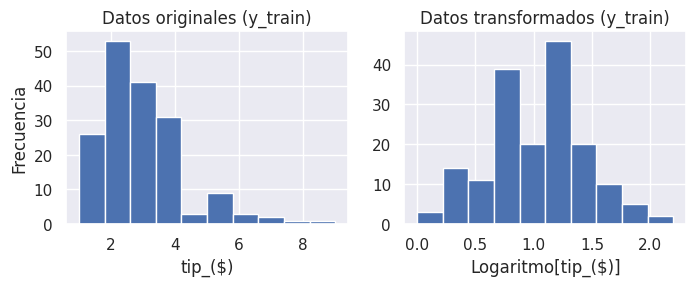

In [69]:
# Grafiquemos los datos de entrenamiento de la variable de salida antes y después
# de la transformación para observar el ajuste realizado:

fig, axes = plt.subplots(1, 2, figsize=(8,2.5))

plt.subplot(1, 2, 1)
plt.hist(y_train)
plt.title('Datos originales (y_train)')
plt.xlabel('tip_($)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(np.log(y_train))
plt.title('Datos transformados (y_train)')
plt.xlabel('Logaritmo[tip_($)]')

plt.show()

Por el momento nos quedamos con esta trnasformación, como una primer aporximación de nuestro ejercicio.

Apliquemos entonces dicha transformación obtenida con los datos de entrenamiento a los tres conjuntos, Train, Val y Test.

Y nuevamente, para fines de la actividad, renombramos los resultados en una nueva variable como se indica a continuación:

In [70]:
# Transformamos la variable de salida:
y_train_t1 = np.log(y_train)
y_val_t1 = np.log(y_val)
y_test_t1 = np.log(y_test)

### **PREGUNTAS:**

*   **¿Por qué en las variables de entrada "$X$" de este problema solo nos ocupamos del rango de variabilidad de las variables y no consideramos el ajuste del sesgo?**

*   **¿Por qué en la distribución de los datos de salida "$y$" de este problema sí nos preocupamos por el sesgo y la forma acampanada de los mismos y no consideramos el rango de variabilidad?**

*   **Observa que en el presente ejercicio y para evitar el filtrado de información, las decisiones durante el preprocesamiento de las variables se han tomado utilizando solo el conjunto de entrenamiento y posteriormente aplicadas directamente a los conjuntos de validación y de prueba. En el presente ejercicio pudimos llevar a cabo todo el proceso con los datos de validación y prueba sin ningún inconveniente, pero ¿cómo crees que puede afectar negativamente esta de manera de proceder, en general? Será importante identificarlas para poder hacer las correcciones pertinentes cuando aparezcan en problemas futuros.**

# **4) Modelo de Regresión Lineal y sus modelos con Regularización.**

### **Modelo de regresión lineal múltiple y modelos con regularización Lasso (o L1), Ridge (o L2) y Elastic-Net (o L1 y L2)**

Puedes consultar la documentación de cada uno en la siguiente liga:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html



### **Sobreentrenamiento (overfitting):**

##### **Recordemos que en un modelo de regresión lineal, el coeficiente de determinación $R^2$ nos indica la proporción de la variabilidad lineal de la variable de salida a partir de las variables de entrada.**

##### **En los ejercicios que estaremos trabajando y mientras no se diga lo contrario, estaremos considerando que un modelo no está sobreentrenado si la diferencia entre el desempeño $R^2$ del conjunto de prueba y el de validación, no es mayor al $3\%$. Recuerda que este umbral es relativo, pero en general es un buen valor inicial para entrenarte en el ajuste de los hiperparámetros de un modelo.**

##### Ahora pasamos finalmente a generar el modelo de regresión lineal múltiple con sus diferentes versiones de regularización: el modelo de regresión lineal múltiple estándar; el modelo de regresión lineal múltiple con regularización L1 o Lasso; el modelo de regresión lineal múltiple con regularización L2 o Ridge; el modelo de regresión lineal múltiple con regularización combinada L1 y L2 o Elastic-Net.

##### En primera instancia debemos cuidar el sobreentrenamiento, es decir, que los valores de la métrica que estamos utilizando (en este caso el coeficiente de determinación $R^2$) en los conjuntos de entrenamiento y de validación, no sean "muy diferentes". En particular, nosotros estaremos considerando que no son "muy diferentes" cuando no difieran más del $3\%$, de lo contrario consideraremos que el modelo está sobreentrenado.

In [106]:
# Primero instanciamos cada uno de los modelos de regresión lineal.
# Realizamos los ajustes que consideremos necesarios a los hiperparámetros hasta que
# obtengamos un desempeño del conjunto de Train y de Val no sobreentrenado.

# Para este ejercicio estoy usando los hiperparámetros indicados, pero obviamente
# puedes ajustarlo con algunos otros.

modeloLR = LinearRegression()
modeloL1 = Lasso(alpha=0.0008)  # pueden ir tendiendo a cero de manera independiente los coeficientes: descarta los que tienen menos impacto.
modeloL2 = Ridge(alpha=5.)    # En general, los coeficientes pueden ir tendiendo a cero, pero todos en conjunto.
modeloL12 = ElasticNet(alpha=0.001, l1_ratio=0.7)

# Entrenamos cada modelo por separado con los datos de entrenamiento:
modeloLR.fit(X_train_t2, y_train_t1)
modeloL1.fit(X_train_t2, y_train_t1)
modeloL2.fit(X_train_t2, y_train_t1)
modeloL12.fit(X_train_t2, y_train_t1)

# Encontramos y comparamos los desempeños con los datos de entrenamiento y validación:
for m in [modeloLR, modeloL1, modeloL2, modeloL12]:
  print(m)
  train_R2 = m.score(X_train_t2, y_train_t1)  # Evaluamos el modelo en los datos de entrenamiento para verificar el sub/sobre/entrenamiento.
  val_R2 = m.score(X_val_t2, y_val_t1)     # Y ahora evaluamos en los datos de validación para darnos una idea de cómo generaliza el modelo.

  print("R2 en el conjunto de entrenamiento: %.4f" % train_R2)
  print("R2 en el conjunto de validación: %.4f" % val_R2)
  print()


LinearRegression()
R2 en el conjunto de entrenamiento: 0.4490
R2 en el conjunto de validación: 0.3979

Lasso(alpha=0.0008)
R2 en el conjunto de entrenamiento: 0.4458
R2 en el conjunto de validación: 0.4201

Ridge(alpha=5.0)
R2 en el conjunto de entrenamiento: 0.4451
R2 en el conjunto de validación: 0.4211

ElasticNet(alpha=0.001, l1_ratio=0.7)
R2 en el conjunto de entrenamiento: 0.4458
R2 en el conjunto de validación: 0.4207



Observamos que el modelo de regresión lineal sin regularización está ligeramente sobreentrenado. En cambio, los tres modelos con regularización generan desempeños bastante aceptables, sin sobreentrenamiento.

### **Importancia de los factores/coeficientes del modelo de regresión lineal.**

**Recordemos que en los modelos de regresión lineal, la magnitud de los coeficientes del modelo resultante nos habla de la importancia de ese factor en la explicabilidad de la variable de salida: mientras mayor sea el valor en magnitud del coeficiente, mayor el impacto e importancia de dicho factor en la predicción de la variable de salida. Y mientras más cercano a cero un coeficiente, menor su impacto en el modelo de predicción.**

In [107]:
# Despleguemos los coeficientes de cada modelo de regresión lineal para analizar
# la importancia de los diferentes coeficientes:

for m in [modeloLR, modeloL1, modeloL2, modeloL12]:
  print(m)
  print("Coeficientes:", m.coef_)
  print()

LinearRegression()
Coeficientes: [[ 0.25139196  0.0417657   0.0368374   0.01784205  0.22323821  0.21282666
   0.25363641 -0.23352539]]

Lasso(alpha=0.0008)
Coeficientes: [ 0.24873401  0.04231032  0.03246787  0.01377197  0.05766854  0.
  0.039769   -0.02921574]

Ridge(alpha=5.0)
Coeficientes: [[ 0.23838115  0.04791279  0.03079808  0.0119552   0.04381158 -0.00303982
   0.03467909 -0.02400667]]

ElasticNet(alpha=0.001, l1_ratio=0.7)
Coeficientes: [ 0.24881565  0.04239136  0.03285464  0.01425558  0.05967935  0.
  0.04064185 -0.02998232]



Aunque en la salida de la celda anterior observamos cuáles coeficientes estarán siendo los más relevantes, a continuación los desplegamos con el nombre de cada factor, para tener una mejor descripción de los mejores factores:

In [108]:
pd.DataFrame(data = modeloL1.coef_.reshape(-1,1),   # El vector de los coeficientes en formato de columna.
             index = X_train_t2.columns)            # Las etiquetas/nombres de cada variable de entrada.

,0
total_bill,0.248734
size,0.042310
sex_Female,0.032468
smoker_No,0.013772
day_Fri,0.057669
day_Sat,0.000000
day_Sun,0.039769
time_Dinner,-0.029216


### **PREGUNTA:**

**Realiza algunas modificaciones a alguno de los modelos e identifica cuáles variables de entrada son las de mayor importancia/impacto para predecir la cantidad de propina que recibirá el mesero.**


### **Finalmente evaluamos el desempeño del modelo en el conjunto de Prueba y el mejor modelo. Observamos que los tres modelos de regularización tienen desempeños muy parecidos, por lo que seleccionemos el más simple y que toma en cuenta las mejores variables, L1 o Lasso:**

In [73]:
print("R2 en el conjunto de prueba: %.4f" % modeloL1.score(X_test_t2, y_test_t1))

R2 en el conjunto de prueba: 0.4352


**Recuerda que mientras mayor sea la diferencia del desempeño del conjunto de prueba (test), con los conjuntos de entrenamiento y validación, el modelo será menos escalable con datos nuevos. De ser así, deberás buscar algún otro modelo, sobre todo no-lineal (de los que estudiaremos en próximas semanas), que ayude a explicar mejor la variabilidad de la variable de salida.**

### **Definiendo funciones propias para evitar errores por el filtrado de información.**

En el ejemplo anterior utilizamos el método score() de la clase del modelo de regresión lineal de sklearn para obtener su evaluación. Además, al verificar la documentación, observamos que la métrica utilizada en dicho método es el coeficiente de determinación $R^2$.

En la misma documentación podemos encontrar la manera en que se define dicha métrica, a saber:

$R^2 = 1 - \frac{SSE}{Syy}$

donde

$SSE$ es la suma de los cuadrados de los errores $\Sigma_{k=1}^{n} (y_k - \hat{y}_k)^2$,

$Syy$ es la suma de cuadrados de la variabilidad total $\Sigma_{k=1}^{n} (y_k - \bar{y})^2$,

$y_k$ son los datos observados de entrenamiento, validación o prueba,

$\hat{y}_k$ es el valor de predicción obtenido con cada dato del conjunto de validación o prueba,

$\bar{y}$ es el valor promedio de las observaciones del conjunto de entrenamiento.

Como comentamos previamente, cuando usamos la librería de scikit-learn con el modelo de regresión lineal, el valor que nos regresa el método "score" es el valor de esta métrica $R^2$.

A manera de ejemplo de cómo podemos definir nuestras propias funciones, definamos nuestra propia función de coeficiente de determinación y que llamaremos $miR^2$ para diferenciarla de la dada por scikit-learn.

In [74]:
# Definimos nuestra función del coeficiente de determinación a partir de las fórmulas dadas previamente y donde:
#    y_k: valores observados de la variable de salida.
#    y_hat : predicciones.
#    y_train.mean() : valor promedio de los datos de entrenamiento de la variable de salida.

# Suma de cuadrados de los errores:
def mi_SSE(y_k, y_hat):
  return ((y_k - y_hat)** 2).sum()

# Suma de cuadrados de la variabilidad total:
def mi_Syy(y_k, y_train):
  return ((y_k - y_train.mean()) ** 2).sum()

# Coeficiente de determinación:
def mi_R2(y_k, y_hat, y_train):
  return 1 - mi_SSE(y_k, y_hat) / mi_Syy(y_k, y_train)


A manera de ejemplo, obtengamos el valor de $miR^2$ para el mejor modelo de regresión lineal Lasso obtenido previamente:

In [75]:
modeloL1 = Lasso(alpha=0.0008)          # instanciamos el modelo deseado.
modeloL1.fit(X_train_t2, y_train_t1)    # entrenamos el modelo con el conjunto de entrenamiento.

y_hat_train = modeloL1.predict(X_train_t2)      # obtenemos las predicciones de entrenamiento.
y_hat_val = modeloL1.predict(X_val_t2)      # obtenemos las predicciones de validación.
y_hat_test = modeloL1.predict(X_test_t2)    # obtenemos las predicciones de prueba.


# Con ravel() convertimos el DataFrame de Pandas en un arreglo de NumPy.
# Observa que en los casos de validación (val) y prueba (test) estamos usando el conjunto
# de entrenamiento (train) para calcular Syy y evitar el posible error que pudiera generar
# un filtrado de información al querer utilizar las medias de los los conjuntos de validación o prueba:
print("R2 en el conjunto de entrenamiento: %.4f" % mi_R2(y_train_t1.values.ravel(), y_hat_train, y_train_t1.values.ravel()))
print("R2 en el conjunto de validación: %.4f" % mi_R2(y_val_t1.values.ravel(), y_hat_val, y_train_t1.values.ravel()))
print("R2 en el conjunto de prueba: %.4f" % mi_R2(y_test_t1.values.ravel(), y_hat_test, y_train_t1.values.ravel()))


R2 en el conjunto de entrenamiento: 0.4458
R2 en el conjunto de validación: 0.4210
R2 en el conjunto de prueba: 0.4390


### **NOTA sobre el Filtrado de Información:**

**Observa que existen pequeñas diferencias entre el valor de $miR^2$ de los conjuntos de validación y de prueba y los de $R^2$ obtenidos con el método score() de Scikit-learn; pero no con el valor del conjunto de entrenamiento. Esto se debe a que en realidad hay una pequeño filtrado de infromación por la manera en que estamos utilizando el método score() de scikit-learn. En particular, al utilizar la media de cada conjunto val y test, en lugar de siempre utilizar la media del conjunto de train. Cuando estudiemos la técnica de Validación Cruzada nos encontraremos nuevamente con estos pequeños filtrados de información, pero también veremos cómo evitarlos o minimizar su impacto.**

**Recuerda que las fórmulas por sí mismas no están equivocadas, estas simplemente esperan recibir la información requerida por sus argumentos. La manera a veces demasiado simplista en que aplicamos los métodos es lo que nos lleva a cometer ciertos errores; pero repito, iremos viendo en su momento cómo ir solventando cada uno de ellos.**

**En general estos filtrados de información generan errores relativamente pequeños, en este ejemplo ambos menores al $0.5\%$ en el coeficiente de determinación. Dependiendo del problema, en ocasiones uno debe ponderar, como en este caso, el obtener un valor aproximado pero con menor costo computacional para un resultado preliminar, o bien, obtener el resultado exacto en el modelo final, pero que requiere un mayor costo computacional. En las próximas semanas estudiaremos la clase Pipeline() de Scikit-learn, la cual nos ayudará evitar estos errores de filtración, aunque con un mayor costo computacional, como lo hemos mencionado. Obviamente en los problemas de la vida real no se desean estar cometiendo errores, por pequeños que estos sean, de aquí la importancia de estudiar la clase Pipeline en las próximas semanas.**

**Para complementar lo relativo al filtrado de información en algunos procedimientos o transformaciones que aplicamos, te recomiendo leer la siguiente página de la misma librería de Scikit-learn. Este artículo hacen evidente estos errores comunes y la manera en que que se pueden evitar o minimizar su impacto en algunos de ellos, o en dado caso al menos estar conscientes de que los estamos cometiendo:**

https://scikit-learn.org/stable/common_pitfalls.html

**Así que por el momento si deseas evitar el filtrado de información al obtener las predicciones de los conjuntos de validación y prueba, deberás definir tus propias métricas y obtenerlas como en el presente ejemplo, sin utilizar en estos conjuntos el método score().**

### **Subentrenamiento (underfitting):**

**Recuerdemos que en todo problema de aprendizaje supervisado se tienen dos problemas principales a superar, el sobreentrenamiento (overfitting) y el subentrenamiento (underfitting).**

Ya ajustamos previamente nuestro modelo de manera que no quedó sobreentrenado. Veamos a continuación que información podemos obtener con los valores de $RMSE$, la métrica dada por la raíz cuadrada del Error Cuadrático Medio, denotado $MSE$ por sus siglas en inglés (Mean Squared Error).

Puedes revisar la documentación para recordar la manera en que se calcula dicha métrica:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

NOTA: Si estás usando una versión más reciente de Scikit-learn, la función a utilizar deberá ser **root_mean_squared_error()**. Revisa la documentación en la liga anterior.

In [76]:
# A manera de ejemplo, obtengamos el valor de RMSE, del mejor modelo de regresión lineal
# múltiple obtenido previamente y con cada uno de los conjuntos de la partición:

modeloL1 = Lasso(alpha=0.0008)
modeloL1.fit(X_train_t2, y_train_t1)

y_hat_train = modeloL1.predict(X_train_t2)
y_hat_val = modeloL1.predict(X_val_t2)
y_hat_test = modeloL1.predict(X_test_t2)

# squared=False nos devuelve la raíz del error cuadrático medio, i.e., RMSE:
RMSEtrain = mean_squared_error(y_train_t1, y_hat_train, squared=False)
RMSEval = mean_squared_error(y_val_t1, y_hat_val, squared=False)
RMSEtest = mean_squared_error(y_test_t1, y_hat_test, squared=False)

print('Raíz del error cuadrático medio:')
print("RMSE-train = %.4f" % RMSEtrain)
print("RMSE-val = %.4f" % RMSEval)
print("RMSE-test = %.4f" % RMSEtest)


Raíz del error cuadrático medio:
RMSE-train = 0.3079
RMSE-val = 0.3385
RMSE-test = 0.3864


Observamos que valores de los errores RMSE de los tres conjuntos son "aproximadamente iguales" en cada conjunto de entrenamiento, validación y prueba. Mientras más grande sea el valor de Train con respecto a Val y de Test con respecto a Test o Train, tendremos un modelo sobreentrenado. En este caso, aunque los errores van creciendo, "no es mucha" la diferencia, por lo que nuevamente pareciera que el sobreentrenamiento no es un problema importante en el modelo obtenido.

Recordemos que estos errores están en las mismas unidades de los datos usados durante el entrenamiento, lo cuales en nuestro ejercicio son el logaritmo natural de los datos de salida, es decir, el logaritmo natural de lo montos de las propinas dadas al mesero en cada servicio dado.

En caso que desees expresar los errores en las mismas unidades de los datos originales, deberás aplicar la función exponencial a dichos errores, ya que la función exponencial base $e$, es la función inversa de la función logaritmo natural. En particular en este caso podríamos dar una mejor interpretabilidad a la diferencia creciente que tiene los valores de RMSE en los conjuntos de entrenamiento, validación y prueba.

Numéricamente podemos obtener una idea más clara de la magnitud del error de RMSE, mediante el **error absoluto** entre los conjuntos de entrenamiento y/o validación y el conjunto de prueba. Podemos además expresar el resultado en unidades de los datos originales, dólares, para darles también un mayor significado.

Veremos más adelante que en ocasiones no se calcula explícitamente el valor de RMSE del conjunto de entrenamiento, sino solo el de validación. Poor ello es usual que se mida la diferencia de los RMSE entre los conjuntos Test  y el de Val.

NOTA: Más adelante aplicaremos la técnica de Validación Cruzada (Cross-Validation) y dicha técnica usualmente solo regresa información de las predicciones del conjunto de validación y no del conjunto de entrenamiento.

In [77]:
# Veamos a manera de ejemplo el caso del error absoluto de RMSE con los conjuntos de Validación y de Prueba.
# Obtengpamosla primero en unidades del logaritmo natural de las propinas:

print('Error absoluto entre los RMSE de los Log[$tips] de Val y Test : %.2f' % np.abs(RMSEtest - RMSEval))

Error absoluto entre los RMSE de los Log[$tips] de Val y Test : 0.05


In [78]:
# Y el error RMSE entre Val y Test pero ahora en las unidades de la variable original,
# es decir, en unidades de dólares:

print('Error absoluto entre los RMSE de los $tips de Val y Test : $%.2f' % np.abs(np.exp(RMSEtest) - np.exp(RMSEval)))

Error absoluto entre los RMSE de los $tips de Val y Test : $0.07


Es decir, tenemos una diferencia de 7 centavos de dólar entre el valor de variabilidad RMSE del conjunto de validación y el de prueba. Podemos decir entonces con base a esta información, que la diferencia es mínima y que el modelo generado no está sobreentrenado.

### **PREGUNTA:**

**¿Por qué aún siendo los valores de RMSE de los conjuntos de validación y de prueba bastante similares, no podemos todavía obtener información sobre si el modelo está o no subentrenado?**

Sin embargo, para determinar si tenemos un modelo subentrenado, recordemos que el error RMSE representa la variabilidad de los logaritmos naturales de la variable de salida y lo estaremos comparando con el rango intercuartil $IQR_{train}$ de los datos de entrenamiento (para evitar nuevamente el filtrado de información) para darnos una idea de la magnitud de variabilidad de nuestras predicciones.

**En un modelo no subentrenado (underfitting) esperaríamos que la variabilidad de los residuos del conjunto de Prueba dada por la raíz cuadrada del error cuadrático medio, $\pm RMSE_{test}$, esté aproximadamente en el mismo rango o aún menor, que el valor del rango intercuartil $IQR_{train}$ del conjunto de entrenamiento.**

Recordemos que el Rango Intercuartil se define como sigue: $IQR = Q_3 - Q_1$ , donde $Q_1$ y $Q_3$ son los valores del primer y tercer cuartil, respectivamente.

Calculemos a continuación el rengo intercuartil del conjunto de entrenamiento (trian) y comparémoslo con el valor de la RMSE del conjunto de prueba (test).

In [79]:
# Rango Intercuartil del conjunto de entrenamiento (train):

Q3 = np.quantile(y_train_t1['tip'], 0.75)   # tercer cuartil
Q1 = np.quantile(y_train_t1['tip'], 0.25)   # primer cuartil

print("Rango intercuartil: IQR = Q3-Q1 = %.2f-%.2f = %.2f" % (Q3,Q1,Q3-Q1))

Rango intercuartil: IQR = Q3-Q1 = 1.25-0.69 = 0.56


In [82]:
# Valor de la raíz cuadrada del error cuadrático medio RMSE del conjunto de prueba.
# Este valor mide la variabilidad de la variable de salida del conjunto de prueba,
# con respecto a las predicciones del modelo con los datos de entrada del conjunto de prueba.

print("RMSE_test = +- %.4f" % RMSEtest)

RMSE_test = +- 0.3864


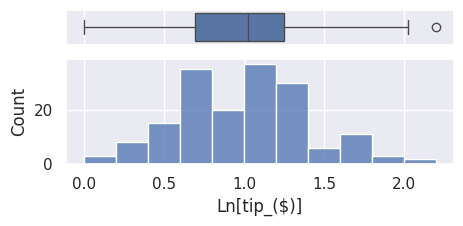

In [81]:
sns.set(rc={'figure.figsize':(5,2)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
sns.boxplot(y_train_t1['tip'], orient="h", ax=ax_box)
sns.histplot(data=y_train_t1, x="tip", ax=ax_hist)
ax_box.set(xlabel='')
ax_hist.set(xlabel='Ln[tip_($)]')
plt.show()

# **5) Conclusiones**

Existen todavía muchos ajustes que se pueden seguir proponiendo (en particular se pueden obtener diversos gráficos entre diversos factores que nos ayuden a entender mejor la manera en que se relacionan entre sí) y que ayuden a mejorar el desempeño del modelo, pero por el momento aquí nos detendremos. Finalmente estamos utilizando un modelo de regresión lineal, que busca precisamente relaciones lineales entre las variables de entrada y la variable de salida. Cuando un modelo tiene un desempeño bajo (subentrenado), por lo general es mejor buscar un nuevo modelo con mayor capacidad para modelar o explicar comportamientos no lineales. Estos modelos son los que estaremos estudiando en próximas semanas.

Sobra decir que no hay reglas generales en el área de aprendizaje automático, pero ve considerando en el futuro todas las decisiones que hemos venido mencionado y aplícalas cuando lo consideres adecuado, esto  te irá dando poco a poco mayor valor como analista, potencializando tus habilidades y toma de decisiones e integrándote dentro del concepto de inteligencia aumentada.

Por otro lado, en los problemas que estaremos estudiando en las siguientes semanas del curso ya no explicaremos de manera tan detallada algunos de los pasos relacionados a temas de Estadística o Matemáticas. Revisa en Canvas la sección "Anexo: Temas de Matemáticas" para reforzar dichos temas.


# **<< Fin del ejemplo: partición, preprocesamiento, sub y sobrentrenamiento, modelo de regresión lineal múltiple>>**